In [ ]:
!pip install -r requirements.txt
!pip install -U albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 581.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.16
    Uninstalling albucore-0.0.16:
      Success

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
import albumentations as A


UNET_RESIZE = 256

transform = A.Compose(
    [
        A.Resize(height=UNET_RESIZE, width=UNET_RESIZE),
        A.Normalize(),
    ]
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from torch.utils.data import DataLoader
from dicom_nii_2d_dataset import DicomNii2DDataset

# 배치 크기를 16으로 설정. 각 미니 배치에 포함될 데이터 샘플의 수를 정의
BATCH_SIZE = 16

# 경로에 맞게 수정 필요
# ./drive/MyDrive/2024/maithon_2024/smart_health_care2/train/breast
train_dataset = DicomNii2DDataset("/content/drive/MyDrive/breast", transform)
train_dataloader = DataLoader(
    train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2
)

In [ ]:
!pip install -U torchmetrics
!pip install -U tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.5/890.5 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 67.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.2
    Uninstalling numpy-2.1.2:
      Successfully uninstalled numpy-2.1.2
  Attempting uninstall: torchmetrics
    Found existing installation: torchmetrics 1.4.2
    Uninstalling torchmetrics-1.4.2:
      Successfully uninstalled torchmetrics-1.4.2


In [ ]:
!pip install scipy==1.7.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 39.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.17 requires numpy>=1.24, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.18 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.18 requires scipy>=1.10.0, but you have scipy 1.7.2 which is incompatible.
arviz 0.19.0 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.
arv

In [ ]:
# 베이스라인 모델

from main import train
from unet import UNet


# UNet 모델을 초기화
model = UNet(in_channels=1, out_channels=1).to(device)

# 하이퍼파라미터(Hyperparameters) 설정
num_epochs = 10
# 1e-3
learning_rate = 0.001

# 모델 학습을 시작
train_losses, train_gds, train_miou = train(
    model, num_epochs, learning_rate, train_dataloader, device
)

Epoch 1/10: 100%|██████████| 13/13 [23:57<00:00, 110.57s/it]


Epoch [1/10], Loss: 0.5625, GDS: 0.01762213, mIoU: 0.00947079


Epoch 2/10: 100%|██████████| 13/13 [23:54<00:00, 110.34s/it]


Epoch [2/10], Loss: 0.3916, GDS: 0.00000000, mIoU: 0.00000000


Epoch 3/10: 100%|██████████| 13/13 [23:57<00:00, 110.58s/it]


Epoch [3/10], Loss: 0.3147, GDS: 0.00000000, mIoU: 0.00000000


Epoch 4/10: 100%|██████████| 13/13 [23:59<00:00, 110.77s/it]


Epoch [4/10], Loss: 0.2617, GDS: 0.00000000, mIoU: 0.00000000


Epoch 5/10: 100%|██████████| 13/13 [24:04<00:00, 111.08s/it]


Epoch [5/10], Loss: 0.2259, GDS: 0.00000000, mIoU: 0.00000000


Epoch 6/10: 100%|██████████| 13/13 [24:00<00:00, 110.78s/it]


Epoch [6/10], Loss: 0.1752, GDS: 0.00000000, mIoU: 0.00000000


Epoch 7/10: 100%|██████████| 13/13 [24:08<00:00, 111.42s/it]


Epoch [7/10], Loss: 0.1411, GDS: 0.00000000, mIoU: 0.00000000


Epoch 8/10: 100%|██████████| 13/13 [24:01<00:00, 110.91s/it]


Epoch [8/10], Loss: 0.1176, GDS: 0.00000000, mIoU: 0.00000000


Epoch 9/10: 100%|██████████| 13/13 [24:00<00:00, 110.81s/it]


Epoch [9/10], Loss: 0.1032, GDS: 0.00000000, mIoU: 0.00000000


Epoch 10/10: 100%|██████████| 13/13 [23:54<00:00, 110.36s/it]

Epoch [10/10], Loss: 0.0916, GDS: 0.00000000, mIoU: 0.00000000


In [ ]:
from datetime import datetime


today_date_str = datetime.now().strftime("%Y-%m-%d_%H-%M")

# 팀 이름 수정
team = "Team Taurus"

# 학습이 완료된 모델의 state_dict(모델 가중치와 매개변수 정보)을 파일로 저장
torch.save(
    model.state_dict(),  # 저장할 모델의 상태 딕셔너리
    f"{today_date_str}_{team}_model_complete_state_dict_{num_epochs:10}.pth",
)

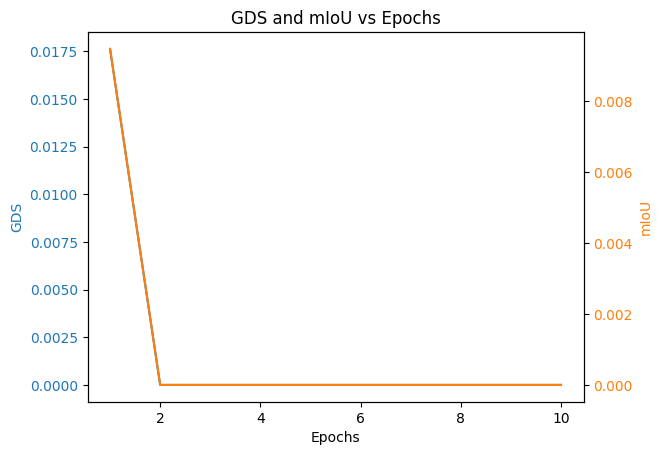

In [ ]:
import matplotlib.pyplot as plt

epochs = list(range(1, num_epochs + 1))

fig, ax1 = plt.subplots()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('GDS', color='tab:blue')
ax1.plot(epochs, train_gds, color='tab:blue', label='GDS')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('mIoU', color='tab:orange')
ax2.plot(epochs, train_miou, color='tab:orange', label='mIoU')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('GDS and mIoU vs Epochs')
plt.show()

In [14]:
# 개발된 모델

from main import train
from unet import UNet

# UNet 모델을 초기화
model = UNet(in_channels=1, out_channels=1).to(device)

# 하이퍼파라미터(Hyperparameters) 설정
num_epochs = 10
# 1e-3
learning_rate = 0.001

# 모델 학습을 시작
train_losses, train_gds, train_miou = train(
    model, num_epochs, learning_rate, train_dataloader, device
)

Epoch 1/10: 100%|██████████| 13/13 [23:58<00:00, 110.68s/it]


Epoch [1/10], Loss: 0.4231, GDS: 0.03102043, mIoU: 0.01821094


Epoch 2/10: 100%|██████████| 13/13 [23:52<00:00, 110.17s/it]


Epoch [2/10], Loss: 0.2664, GDS: 0.00000000, mIoU: 0.00000000


Epoch 3/10: 100%|██████████| 13/13 [23:52<00:00, 110.21s/it]


Epoch [3/10], Loss: 0.2020, GDS: 0.00000000, mIoU: 0.00000000


Epoch 4/10: 100%|██████████| 13/13 [23:56<00:00, 110.52s/it]


Epoch [4/10], Loss: 0.1619, GDS: 0.00000000, mIoU: 0.00000000


Epoch 5/10: 100%|██████████| 13/13 [23:54<00:00, 110.37s/it]


Epoch [5/10], Loss: 0.1310, GDS: 0.00127833, mIoU: 0.00073717


Epoch 6/10: 100%|██████████| 13/13 [24:33<00:00, 113.33s/it]


Epoch [6/10], Loss: 0.1111, GDS: 0.00000000, mIoU: 0.00000000


Epoch 7/10: 100%|██████████| 13/13 [23:57<00:00, 110.60s/it]


Epoch [7/10], Loss: 0.0971, GDS: 0.00000000, mIoU: 0.00000000


Epoch 8/10: 100%|██████████| 13/13 [23:53<00:00, 110.27s/it]


Epoch [8/10], Loss: 0.0806, GDS: 0.00000000, mIoU: 0.00000000


Epoch 9/10: 100%|██████████| 13/13 [23:42<00:00, 109.42s/it]


Epoch [9/10], Loss: 0.0724, GDS: 0.00000000, mIoU: 0.00000000


Epoch 10/10: 100%|██████████| 13/13 [23:40<00:00, 109.29s/it]

Epoch [10/10], Loss: 0.0656, GDS: 0.00009427, mIoU: 0.00004760


In [15]:
from datetime import datetime


today_date_str = datetime.now().strftime("%Y-%m-%d_%H-%M")

# 팀 이름 수정
team = "Team Taurus"

# 학습이 완료된 모델의 state_dict(모델 가중치와 매개변수 정보)을 파일로 저장
torch.save(
    model.state_dict(),  # 저장할 모델의 상태 딕셔너리
    f"{today_date_str}_{team}_model_complete_state_dict_{num_epochs:10}.pth",
)

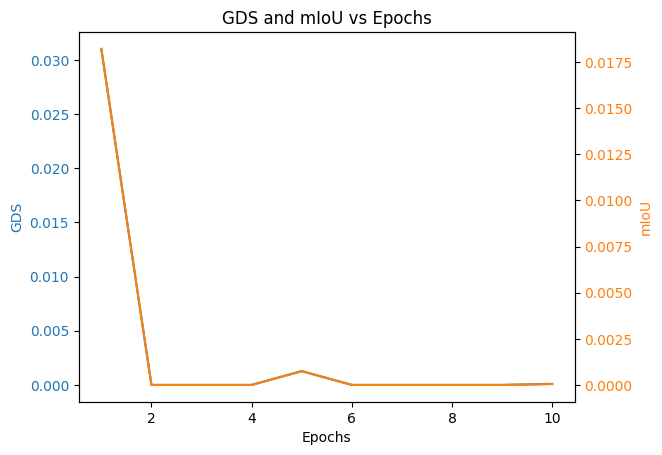

In [16]:
import matplotlib.pyplot as plt

epochs = list(range(1, num_epochs + 1))

fig, ax1 = plt.subplots()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('GDS', color='tab:blue')
ax1.plot(epochs, train_gds, color='tab:blue', label='GDS')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('mIoU', color='tab:orange')
ax2.plot(epochs, train_miou, color='tab:orange', label='mIoU')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('GDS and mIoU vs Epochs')
plt.show()

In [17]:
!pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.17
albumentations                     1.4.18
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.14.0.32.55
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread      